# Modèle sélectionné

Import des packages

In [51]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.externals.joblib import dump, load

Chargement des datasets train et test

In [2]:
#Les datasets train et test
df_train = pd.read_csv("df_train20190319.csv", index_col = 0) # indexé par card_id
df_test = pd.read_csv("df_test20190319.csv", index_col = 0) # indexé par card_id

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201917 entries, C_ID_92a2005557 to C_ID_92c9984c58
Data columns (total 11 columns):
feature_1                   201917 non-null int64
feature_2                   201917 non-null int64
feature_3                   201917 non-null int64
target                      201917 non-null float64
nb_purchases_hist           201917 non-null int64
nb_purchases_new            201917 non-null float64
purchase_amount_tot_hist    201917 non-null float64
purchase_amount_tot_new     201917 non-null float64
active_months               201917 non-null int64
last_purchase_hist          201917 non-null object
last_purchase_new           201917 non-null object
dtypes: float64(4), int64(5), object(2)
memory usage: 18.5+ MB


In [4]:
df_train.head()

,feature_1,feature_2,feature_3,target,nb_purchases_hist,nb_purchases_new,purchase_amount_tot_hist,purchase_amount_tot_new,active_months,last_purchase_hist,last_purchase_new
card_id,,,,,,,,,,,
C_ID_92a2005557,5,2,1,-0.820283,260,23.0,-165.968739,-13.244202,8,2018-02-25 09:31:15,2018-04-29 11:23:05
C_ID_3d0044924f,4,1,0,0.392913,350,6.0,-210.006336,-4.355735,13,2018-01-31 22:31:09,2018-03-30 06:48:26
C_ID_d639edf6cd,2,2,0,0.688056,43,1.0,-29.167391,-0.700326,18,2018-02-27 19:08:25,2018-04-28 17:43:11
C_ID_186d6a6901,4,3,0,0.142495,77,7.0,-49.491364,-4.654372,5,2018-02-28 11:44:40,2018-04-18 11:00:11
C_ID_cdbd2c0db2,1,3,0,-0.159749,133,36.0,-48.687656,-19.926237,3,2018-02-28 20:40:41,2018-04-28 18:50:25


In [5]:
pd.isnull(df_train).sum()

feature_1                   0
feature_2                   0
feature_3                   0
target                      0
nb_purchases_hist           0
nb_purchases_new            0
purchase_amount_tot_hist    0
purchase_amount_tot_new     0
active_months               0
last_purchase_hist          0
last_purchase_new           0
dtype: int64

In [6]:
df_test.describe()

,feature_1,feature_2,feature_3,active_months,nb_purchases_hist,nb_purchases_new,purchase_amount_tot_hist,purchase_amount_tot_new
count,123623.00000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000
mean,3.10926,1.741796,0.564377,12.481302,89.646360,6.013007,-14.989708,-3.301020
std,1.18911,0.749195,0.495840,9.608791,106.370249,6.620383,1374.615917,4.404536
min,1.00000,1.000000,0.000000,1.000000,2.000000,0.000000,-3595.347171,-60.780407
25%,2.00000,1.000000,0.000000,5.000000,27.000000,2.000000,-65.647149,-4.811249
50%,3.00000,2.000000,1.000000,10.000000,55.000000,4.000000,-30.191057,-2.145485
75%,4.00000,2.000000,1.000000,16.000000,111.000000,8.000000,-12.492644,-0.704450
max,5.00000,3.000000,1.000000,75.000000,5582.000000,104.000000,137955.713035,263.157498


In [7]:
df_test.head()

,feature_1,feature_2,feature_3,active_months,nb_purchases_hist,nb_purchases_new,purchase_amount_tot_hist,purchase_amount_tot_new,last_purchase_hist,last_purchase_new
card_id,,,,,,,,,,
C_ID_0ab67a22ab,3,3,1,10,68,3.0,-40.733733,-1.777156,2017-12-29 01:05:24,2018-02-28 19:08:52
C_ID_130fd0cbdd,2,3,0,13,78,9.0,-49.136513,-5.944698,2018-02-18 21:30:11,2018-04-20 18:00:17
C_ID_b709037bc5,5,1,1,6,13,2.0,4.528840,0.180138,2018-02-02 18:57:03,2018-03-13 13:10:46
C_ID_d27d835a9f,2,1,0,2,26,10.0,-13.690715,-5.743674,2018-02-20 11:42:39,2018-04-17 21:22:23
C_ID_2b5e3df5c2,5,1,1,26,110,6.0,25.139384,12.064997,2018-02-27 10:42:04,2018-04-12 12:13:11


### Traitement des colonnes de dates

Pour transformer la colonne en un entier facilement utilisable par le RandomForestRegressor

In [14]:
#On remet les valeurs manquantes (0) sous la même forme que les autres
for df in [df_train, df_test]:
    for col in ["last_purchase_hist", "last_purchase_new"]:
        df[col] = df[col].replace([0],["0000-00-00 00:00:00"])


In [19]:
for df in [df_train, df_test]:
    for col in ["last_purchase_hist", "last_purchase_new"]:
        df[col] = df[col].apply(lambda x: x[:10])

In [23]:
df_train.head()

,feature_1,feature_2,feature_3,target,nb_purchases_hist,nb_purchases_new,purchase_amount_tot_hist,purchase_amount_tot_new,active_months,last_purchase_hist,last_purchase_new
card_id,,,,,,,,,,,
C_ID_92a2005557,5,2,1,-0.820283,260,23.0,-165.968739,-13.244202,8,2018-02-25,2018-04-29
C_ID_3d0044924f,4,1,0,0.392913,350,6.0,-210.006336,-4.355735,13,2018-01-31,2018-03-30
C_ID_d639edf6cd,2,2,0,0.688056,43,1.0,-29.167391,-0.700326,18,2018-02-27,2018-04-28
C_ID_186d6a6901,4,3,0,0.142495,77,7.0,-49.491364,-4.654372,5,2018-02-28,2018-04-18
C_ID_cdbd2c0db2,1,3,0,-0.159749,133,36.0,-48.687656,-19.926237,3,2018-02-28,2018-04-28


In [25]:
for df in [df_train, df_test]:
    for col in ["last_purchase_hist", "last_purchase_new"]:
        df[col] = df[col].apply(lambda x: int(x[:4] + x[5:7] + x[8:10]))

In [26]:
df_train.head()

,feature_1,feature_2,feature_3,target,nb_purchases_hist,nb_purchases_new,purchase_amount_tot_hist,purchase_amount_tot_new,active_months,last_purchase_hist,last_purchase_new
card_id,,,,,,,,,,,
C_ID_92a2005557,5,2,1,-0.820283,260,23.0,-165.968739,-13.244202,8,20180225,20180429
C_ID_3d0044924f,4,1,0,0.392913,350,6.0,-210.006336,-4.355735,13,20180131,20180330
C_ID_d639edf6cd,2,2,0,0.688056,43,1.0,-29.167391,-0.700326,18,20180227,20180428
C_ID_186d6a6901,4,3,0,0.142495,77,7.0,-49.491364,-4.654372,5,20180228,20180418
C_ID_cdbd2c0db2,1,3,0,-0.159749,133,36.0,-48.687656,-19.926237,3,20180228,20180428


Pour le meilleur modèle, aller directement à "Crossvalidation avec GridSearchCV".

### Modèle RandomForestRegressor rapide

Deux fonctions utiles

In [9]:
#Pour entraîner un modèle et récupérer les prédictions

def training(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Score train :", model.score(X_train, y_train))
    print("Score test :",model.score(X_test, y_test))

    print("RMSE train :", np.sqrt(mean_squared_error(pred_train, y_train)))
    print("RMSE test :", np.sqrt(mean_squared_error(pred_test, y_test)))
    #Trace les prédictions
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(y_test, pred_test)
    ax.plot([-34,20], [-34,20], label = "y_pred = y_test")
    ax.set_xlabel("y_test")
    ax.set_ylabel("pred_test")
    ax.legend()
    plt.show()
    return pred_train, pred_test

#Pour faire les prédictions kaggle et les enregistrer, ainsi que le modèle
#model : le modèle entraîné
#file_submission : le nom du fichier où enregistrer la soumission (éventuellement avec son chemin d'accès)
#file_model : le nom du fichier où enregistrer le modèle (éventuellement avec son chemin d'accès)v
# c'est un .joblib

def kaggle_prediction(model, df_test, X_test_kaggle, file_submission, file_model):
    
    pred_test_kaggle = model.predict(X_test_kaggle)
    d = {"card_id" : df_test.index, "target" : pred_test_kaggle}
    soumission_kaggle = pd.DataFrame(data = d)
    soumission_kaggle.to_csv(file_submission, index = False)
    dump(model, file_model)

    return soumission_kaggle

In [27]:
my_columns = df_train.drop("target", axis = 1).columns

data = df_train[my_columns]
data_test = df_test[my_columns]
target = df_train.target

#scaler = StandardScaler().fit(data)
#data_scaled = scaler.transform(data)
#data_test_scaled = scaler.transform(data_test)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 42)



In [28]:
data.head()

,feature_1,feature_2,feature_3,nb_purchases_hist,nb_purchases_new,purchase_amount_tot_hist,purchase_amount_tot_new,active_months,last_purchase_hist,last_purchase_new
card_id,,,,,,,,,,
C_ID_92a2005557,5,2,1,260,23.0,-165.968739,-13.244202,8,20180225,20180429
C_ID_3d0044924f,4,1,0,350,6.0,-210.006336,-4.355735,13,20180131,20180330
C_ID_d639edf6cd,2,2,0,43,1.0,-29.167391,-0.700326,18,20180227,20180428
C_ID_186d6a6901,4,3,0,77,7.0,-49.491364,-4.654372,5,20180228,20180418
C_ID_cdbd2c0db2,1,3,0,133,36.0,-48.687656,-19.926237,3,20180228,20180428


Score train : 0.048937500706523474
Score test : 0.04235854348107648
RMSE train : 3.748826718446139
RMSE test : 3.7930979093875115


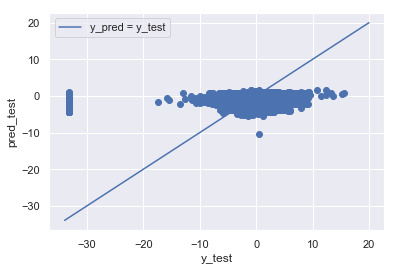

In [29]:
forest = RandomForestRegressor(n_estimators = 10, max_depth = 5)
pred_train, pred_test = training(forest, X_train, X_test, y_train, y_test)

In [30]:
feats = {}
for feature, importance in zip(data.columns, forest.feature_importances_):
    feats[feature] = importance

forest.feature_importances_
importances = pd.DataFrame.from_dict(feats, orient = "index", columns = ["Importance"])
importances.sort_values(by = "Importance", ascending = False).head(16)

,Importance
last_purchase_hist,0.450973
nb_purchases_new,0.142901
last_purchase_new,0.119959
purchase_amount_tot_new,0.119872
nb_purchases_hist,0.115571
active_months,0.024166
purchase_amount_tot_hist,0.023586
feature_3,0.001537
feature_2,0.001292
feature_1,0.000144


In [31]:
soumission_kaggle = kaggle_prediction(forest, df_test, data_test, "submission_file_el9911ml_11.csv", "forest_20190319")

In [32]:
soumission_kaggle.head()

,card_id,target
0,C_ID_0ab67a22ab,-0.590435
1,C_ID_130fd0cbdd,-0.276610
2,C_ID_b709037bc5,-1.231228
3,C_ID_d27d835a9f,-0.276610
4,C_ID_2b5e3df5c2,-0.952437


## Cross-validation avec KFold

In [39]:
clf = RandomForestRegressor(n_estimators = 2)

In [46]:
clf = RandomForestRegressor()
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 42)

for k, (train, test) in enumerate(k_fold.split(data, target)):
    print(k, train[:3], test[:3])

0 [0 1 2] [ 4  6 12]
1 [1 2 3] [ 0 11 20]
2 [0 2 4] [ 1  3 14]
3 [0 1 3] [2 7 8]
4 [0 1 2] [ 5 10 15]


In [50]:
model = RandomForestRegressor(n_estimators = 10, max_depth = 7)
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 42)
    
for k, (train, test) in enumerate(k_fold.split(data, target)):
    X_train = data.iloc[train][:]
    X_test = data.iloc[test][:]
    y_train = target[train]
    y_test = target[test]
    
    clf.fit(X_train, y_train)
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    print("[fold {0}] n_estimators: {1}, max_depth: {2}".
          format(k, model.n_estimators, model.max_depth))
    print("Score train :", model.score(X_train, y_train))
    print("Score test :", model.score(X_test, y_test))

    print("RMSE train :", np.sqrt(mean_squared_error(pred_train, y_train)))
    print("RMSE test :", np.sqrt(mean_squared_error(pred_test, y_test)))
    print("-----")
    


[fold 0] n_estimators: 10, max_depth: 7
Score train : 0.07288451829859266
Score test : 0.047788624941691005
RMSE train : 3.701329549273107
RMSE test : 3.782328685194073
-----
[fold 1] n_estimators: 10, max_depth: 7
Score train : 0.07049410680180912
Score test : 0.0479897379588039
RMSE train : 3.708735889510851
RMSE test : 3.771308792383889
-----
[fold 2] n_estimators: 10, max_depth: 7
Score train : 0.07268230410425469
Score test : 0.04823966574680094
RMSE train : 3.674718101070114
RMSE test : 3.8879460196235827
-----
[fold 3] n_estimators: 10, max_depth: 7
Score train : 0.0744289831478182
Score test : 0.042803461032181134
RMSE train : 3.73132257064287
RMSE test : 3.655626955183673
-----
[fold 4] n_estimators: 10, max_depth: 7
Score train : 0.07386028063451311
Score test : 0.04297146242298022
RMSE train : 3.7212715964553245
RMSE test : 3.7022912598208397
-----


## Crossvalidation avec GridSearchCV -> meilleur modèle

In [59]:
model = RandomForestRegressor()
parametres = {"max_depth" : range(5,15), "n_estimators" : range(1,15)}

In [60]:
grid_model = GridSearchCV(estimator = model, param_grid = parametres)
grille = grid_model.fit(data, target)

print(pd.DataFrame.from_dict(grille.cv_results_).loc[:, ["params", "mean_test_score"]])

grille.best_params_

C:\OUTILS\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


                                    params  mean_test_score
0      {'max_depth': 5, 'n_estimators': 1}         0.032325
1      {'max_depth': 5, 'n_estimators': 2}         0.036431
2      {'max_depth': 5, 'n_estimators': 3}         0.038720
3      {'max_depth': 5, 'n_estimators': 4}         0.040098
4      {'max_depth': 5, 'n_estimators': 5}         0.040897
5      {'max_depth': 5, 'n_estimators': 6}         0.040835
6      {'max_depth': 5, 'n_estimators': 7}         0.042235
7      {'max_depth': 5, 'n_estimators': 8}         0.042618
8      {'max_depth': 5, 'n_estimators': 9}         0.042295
9     {'max_depth': 5, 'n_estimators': 10}         0.042840
10    {'max_depth': 5, 'n_estimators': 11}         0.041979
11    {'max_depth': 5, 'n_estimators': 12}         0.042711
12    {'max_depth': 5, 'n_estimators': 13}         0.042424
13    {'max_depth': 5, 'n_estimators': 14}         0.042646
14     {'max_depth': 6, 'n_estimators': 1}         0.028642
15     {'max_depth': 6, 'n_estimators': 

C:\OUTILS\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\OUTILS\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\OUTILS\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\OUTILS\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: Fu

AttributeError: 'GridSearchCV' object has no attribute 'best_params'

In [61]:
grille.best_params_

{'max_depth': 8, 'n_estimators': 12}

In [62]:
soumission_kaggle = kaggle_prediction(grid_model, df_test, data_test, "submission_file_el9911ml_12.csv", "grille_cv3_20190319")

Résultats : RMSE Private LB : 3.71704

RMSE Public LB : 3.81015